In [1]:
import pandas as pd
import numpy as np
import requests
import json
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup


# Dúvidas gerais

- Q1: 
    - A média dos vizinhos é só preencher com a média da coluna mesmo?
- Q2:
    - Os retornos deveriam ser acumulados?

- Q1. Usando o  python  (sugerimos o  pacote  yfinance  ou  o  pandas)importe  os  dados  de  preço  de fechamento de 01/11/2017até 01/01/2022 das ações que compõem o indice IBRX 50. Preencha dados faltantes de cada série com as médias dos vizinhos. Mostre que o DataFrame resultante não temvalores vazios.

## 1.1 Getting the current stocks in IBRX 50

### - 1.1.1 From Infomoney

In [2]:
ibrx50_im_url = 'https://www.infomoney.com.br/cotacoes/b3/indice/ibrx50/'
ibrx50_im = pd.read_html(ibrx50_im_url, decimal=',', thousands='.')[2:]
ibrx50_im = pd.concat(ibrx50_im).reset_index(drop=True)
ibrx50_im

,Ativo,Último (R$),Var. Dia (%),Val. Min (R$),Val. Máx (R$),Data
0,ABEV3,15.54,4.88,15.53,16.32,17:07 03/10
1,BBAS3,38.52,7.63,40.50,42.20,17:07 03/10
2,BBDC4,19.84,6.91,20.14,21.31,17:07 03/10
3,BRAP4,23.76,2.19,23.72,24.53,17:07 03/10
4,VBBR3,17.25,7.65,17.73,18.73,17:07 03/10
5,SUZB3,44.50,2.04,44.22,45.74,17:07 03/10
6,GGBR4,24.44,2.91,24.74,25.57,17:07 03/10
7,BRKM5,26.24,4.69,26.73,27.62,17:07 03/10
8,CSNA3,12.72,4.17,12.87,13.30,17:07 03/10
9,RADL3,22.73,5.81,22.92,24.16,17:07 03/10


In [3]:
# Saving only tickers
stocks_im = ibrx50_im['Ativo'].tolist()
#stocks_im

In [134]:
#ibrx50_im.to_excel('ibrx50_im.xlsx', index = False)

### Alternative source (Actually the main)
- 1.1.2 From B3

In [4]:
# 
url = 'https://sistemaswebb3-listados.b3.com.br/indexProxy/indexCall/GetPortfolioDay/eyJpbmRleCI6IklCWEwiLCJsYW5ndWFnZSI6InB0LWJyIn0='
r = requests.get(url)
pd.json_normalize(json.loads(r.content))
ibrx50_b3 =  pd.json_normalize(json.loads(r.content), record_path =['results'])
ibrx50_b3.drop(columns=['segment', 'partAcum'], inplace=True) # Not really necessary
ibrx50_b3['part'] = ibrx50_b3['part'].apply(lambda x: float(x.replace(',', '.'))/100) # Also not necessary in this case
ibrx50_b3['theoricalQty'] = ibrx50_b3['theoricalQty'].apply(lambda x: int(x.replace('.', ''))) # Same as above
ibrx50_b3.sort_values(by='part', ascending=False, inplace=True)
ibrx50_b3


,cod,asset,type,part,theoricalQty
46,VALE3,VALE,ON NM,0.17986,4547296398
36,PETR4,PETROBRAS,PN N2,0.07639,4566441248
25,ITUB4,ITAUUNIBANCO,PN EJ N1,0.07351,4799907051
35,PETR3,PETROBRAS,ON N2,0.06954,3701760571
8,BBDC4,BRADESCO,PN EJ N1,0.05673,5156077326
17,ELET3,ELETROBRAS,ON N1,0.04579,2021139464
5,B3SA3,B3,ON NM,0.04468,5901731302
1,ABEV3,AMBEV S/A,ON,0.03634,4386652506
28,RENT3,LOCALIZA,ON EJS NM,0.03033,893978241
10,BBAS3,BRASIL,ON NM,0.02911,1420731069


In [137]:
#ibrx50_b3.to_excel('ibrx50_b3.xlsx', index = False)

In [5]:
# Subsetting only tickers and adding '.SA' to match yfinance format
tickers = [ticker + '.SA' for ticker in ibrx50_b3['cod']]
tickers

['VALE3.SA',
 'PETR4.SA',
 'ITUB4.SA',
 'PETR3.SA',
 'BBDC4.SA',
 'ELET3.SA',
 'B3SA3.SA',
 'ABEV3.SA',
 'RENT3.SA',
 'BBAS3.SA',
 'WEGE3.SA',
 'ITSA4.SA',
 'HAPV3.SA',
 'SUZB3.SA',
 'BPAC11.SA',
 'EQTL3.SA',
 'LREN3.SA',
 'RDOR3.SA',
 'RADL3.SA',
 'GGBR4.SA',
 'JBSS3.SA',
 'PRIO3.SA',
 'RAIL3.SA',
 'CSAN3.SA',
 'VBBR3.SA',
 'BBSE3.SA',
 'TOTS3.SA',
 'MGLU3.SA',
 'BRFS3.SA',
 'ASAI3.SA',
 'CCRO3.SA',
 'KLBN11.SA',
 'ELET6.SA',
 'NTCO3.SA',
 'AMER3.SA',
 'EMBR3.SA',
 'RRRP3.SA',
 'CSNA3.SA',
 'BRML3.SA',
 'BRKM5.SA',
 'MULT3.SA',
 'BRAP4.SA',
 'VIIA3.SA',
 'AZUL4.SA',
 'LWSA3.SA',
 'USIM5.SA',
 'PETZ3.SA',
 'MRFG3.SA',
 'CVCB3.SA',
 'CASH3.SA']

## - 1.2 importando  os  dados  de  preço  de fechamento de 01/11/2017 até 01/01/2022

In [6]:
# Self explained, but treats the columns names - Taking the '.SA' out
def fix_col_names(df):
    return [col.rstrip('.SA') for col in df.columns]

In [7]:
# Actually getting closing prices from yfinance
prices = yf.download(tickers, start='2017-11-01', end='2022-01-01', rounding=True)['Adj Close']
prices.columns = fix_col_names(prices) # Fixing column names
prices


[*********************100%***********************]  50 of 50 completed


,ABEV3,AMER3,ASAI3,AZUL4,B3SA3,BBAS3,BBDC4,BBSE3,BPAC11,BRAP4,...,RDOR3,RENT3,RRRP3,SUZB3,TOTS3,USIM5,VALE3,VBBR3,VIIA3,WEGE3
Date,,,,,,,,,,,,,,,,,,,,,
2017-11-01,17.99,21.56,NaN,27.36,6.54,25.64,15.19,18.43,4.48,12.73,...,NaN,17.32,NaN,18.78,10.75,7.21,22.71,NaN,7.3138,7.58
2017-11-02,17.99,21.56,NaN,27.36,6.54,25.64,15.19,18.43,4.48,12.73,...,NaN,17.32,NaN,18.78,10.75,7.21,22.71,NaN,7.3138,7.58
2017-11-03,17.87,20.12,NaN,26.80,6.39,25.18,15.34,18.33,4.37,13.10,...,NaN,17.26,NaN,18.78,10.63,7.10,23.21,NaN,7.3636,7.68
2017-11-06,17.82,19.24,NaN,26.84,6.40,24.98,15.34,18.99,4.35,13.29,...,NaN,17.16,NaN,18.78,10.83,7.54,23.76,NaN,7.3138,7.78
2017-11-07,17.52,17.40,NaN,25.90,6.19,23.73,14.82,18.28,4.35,12.87,...,NaN,18.08,NaN,18.78,11.04,6.88,23.20,NaN,7.2043,7.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,15.55,30.12,13.98,26.46,10.99,27.71,17.13,19.15,21.02,22.72,...,42.19,53.84,31.27,58.59,28.50,14.10,72.46,20.54,4.5000,32.93
2021-12-27,15.53,31.27,13.53,25.67,10.93,27.77,17.32,19.27,21.04,23.32,...,44.23,54.13,31.77,58.74,28.57,14.27,72.28,20.81,4.8600,32.64
2021-12-28,15.52,30.42,12.99,25.75,10.78,27.61,17.26,19.31,20.30,23.18,...,45.34,52.66,32.07,58.08,28.09,13.99,70.54,20.96,4.9500,32.75


In [8]:
# MAIORES DADOS FALTANTES - Naturalmente são as ações que não haviam capital aberto em todo período
prices.isna().sum().sort_values(ascending=False)

ASAI3     823
RDOR3     776
RRRP3     755
CASH3     751
PETZ3     714
LWSA3     563
NTCO3     531
HAPV3     123
VBBR3      93
PRIO3       1
MGLU3       1
MRFG3       1
MULT3       1
PETR3       1
PETR4       1
ABEV3       1
RADL3       1
KLBN11      1
RAIL3       1
RENT3       1
SUZB3       1
TOTS3       1
USIM5       1
VALE3       1
VIIA3       1
LREN3       1
ITUB4       1
JBSS3       1
BRML3       1
AZUL4       1
B3SA3       1
BBAS3       1
BBDC4       1
BBSE3       1
BPAC11      1
BRAP4       1
BRFS3       1
BRKM5       1
CCRO3       1
AMER3       1
CSAN3       1
CSNA3       1
CVCB3       1
ELET3       1
ELET6       1
EMBR3       1
EQTL3       1
GGBR4       1
ITSA4       1
WEGE3       1
dtype: int64

<AxesSubplot:>

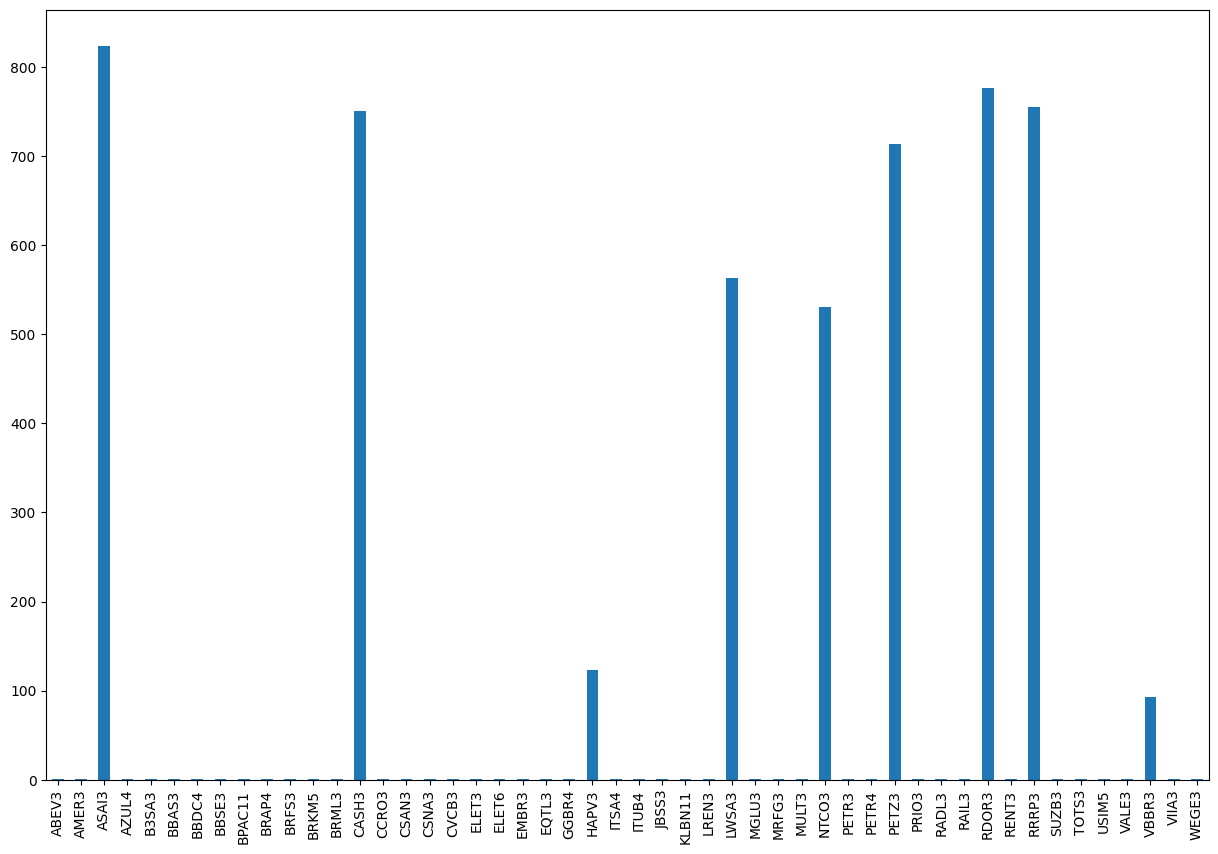

In [9]:
# Visualizando
plt.figure(figsize=(15, 10))
prices.isna().sum().plot(kind='bar')

## - 1.3 Preenchendo valores nulos com médias dos vizinhos

In [ ]:
def filling_na(df):
    return ['IBOV' if col == '^BVSP' else col.rstrip('SA') for col in df.columns]



In [52]:
# Preencher com a média dos vizinhos? Não entendi direito fazer só a média da coluna
prices.columns = prices.

ValueError: Invalid fill method. Expecting pad (ffill) or backfill (bfill). Got mean

## - 1.4 Visualizando que todos os valores nulos foram tratados


- Q2. Em uma célula mostre os últimos 12 dias de preços, ordenados do mais recente para o mais antigo. Nas 2 células seguintes mostre os retornos diários para os mesmos dias, na primeira calculados usando diferença de logaritmos e na segunda a diferença percentual.Mostre a diferença das duas medidas.

## - 2.1 Últimos 12 dias de preços do mais recente ao mais antigo

In [11]:
# Last 12 days sorted from newest to oldest
last12 = prices.tail(15)
last12.sort_values(by='Date', ascending=False)

,ABEV3,AMER3,ASAI3,AZUL4,B3SA3,BBAS3,BBDC4,BBSE3,BPAC11,BRAP4,...,RDOR3,RENT3,RRRP3,SUZB3,TOTS3,USIM5,VALE3,VBBR3,VIIA3,WEGE3
Date,,,,,,,,,,,,,,,,,,,,,
2021-12-30,15.42,30.96,12.86,24.36,10.76,27.36,17.12,19.27,20.54,23.64,...,44.34,52.12,33.55,58.52,28.54,14.38,71.37,20.90,5.25,32.45
2021-12-29,15.45,30.41,12.74,23.86,10.70,27.46,17.20,19.20,20.31,23.17,...,43.86,51.23,33.48,57.47,27.79,14.04,70.72,20.60,5.02,32.21
2021-12-28,15.52,30.42,12.99,25.75,10.78,27.61,17.28,19.31,20.30,23.18,...,45.34,52.66,32.07,58.08,28.09,13.99,70.54,20.96,4.95,32.75
2021-12-27,15.53,31.27,13.53,25.67,10.93,27.77,17.34,19.27,21.04,23.32,...,44.23,54.13,31.77,58.74,28.57,14.27,72.28,20.81,4.86,32.64
2021-12-23,15.55,30.12,13.98,26.46,10.99,27.71,17.14,19.15,21.02,22.72,...,42.19,53.84,31.27,58.59,28.50,14.10,72.46,20.54,4.50,32.93
2021-12-22,15.39,30.02,14.05,26.80,11.11,27.81,17.09,19.05,21.33,22.55,...,42.28,54.71,31.48,58.05,29.03,14.14,73.17,20.76,4.50,33.13
2021-12-21,15.40,30.19,14.14,26.44,10.98,27.98,17.01,19.06,20.97,22.30,...,44.82,54.97,30.84,58.40,28.88,14.35,73.55,20.85,4.61,33.37
2021-12-20,15.42,30.48,13.99,24.51,11.33,27.90,17.08,18.93,21.18,21.13,...,44.70,55.07,30.30,58.30,28.93,13.92,71.67,21.02,4.74,33.46
2021-12-17,15.47,30.70,14.34,25.42,11.74,28.76,17.44,19.08,22.13,21.89,...,45.37,55.69,32.30,59.88,29.45,14.74,72.48,21.58,4.85,34.26


In [13]:
# Retorno Logarítmico - Confirmar fórmula
log_return = np.log(last12/ last12.shift(1))
log_return


,ABEV3,AMER3,ASAI3,AZUL4,B3SA3,BBAS3,BBDC4,BBSE3,BPAC11,BRAP4,...,RDOR3,RENT3,RRRP3,SUZB3,TOTS3,USIM5,VALE3,VBBR3,VIIA3,WEGE3
Date,,,,,,,,,,,,,,,,,,,,,
2021-12-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-10,0.008505,0.018787,0.023118,-0.007315,0.055715,0.014791,-0.003927,0.002038,0.059073,0.003358,...,0.030312,0.026042,0.010900,0.010237,0.024630,0.017700,0.006228,0.024648,0.022141,-0.019418
2021-12-13,0.003901,-0.046145,-0.012544,-0.035395,-0.018804,-0.008190,-0.018724,-0.012804,0.006752,0.028331,...,-0.025747,0.009304,0.004262,-0.013435,-0.009402,0.011859,0.028748,0.004947,-0.031513,-0.005700
2021-12-14,0.009687,-0.020448,0.001402,0.008768,-0.004323,0.000000,0.014781,-0.005686,-0.044493,-0.001398,...,-0.033680,0.004620,-0.028872,0.002311,-0.035575,-0.005563,-0.000140,-0.019022,-0.068186,-0.008611
2021-12-15,-0.005155,0.072303,0.020105,0.011050,-0.003472,-0.017253,0.000000,0.012365,0.027298,-0.007957,...,-0.008600,0.030723,-0.006757,0.015504,0.028624,0.009025,-0.005628,0.004562,0.047253,0.008897
2021-12-16,0.001291,0.085557,-0.010348,-0.025036,0.000869,-0.003017,0.012339,-0.004619,-0.008249,0.022306,...,-0.020507,0.007365,0.070980,0.026056,-0.047064,0.031965,0.038341,0.000455,-0.057385,-0.000286
2021-12-17,-0.001937,0.002936,-0.005563,0.022679,0.019786,-0.035187,-0.028266,-0.018692,0.018240,0.005956,...,0.000000,-0.050934,0.019697,0.019732,-0.021499,-0.013477,-0.015878,-0.018366,-0.012295,-0.021084
2021-12-20,-0.003237,-0.007192,-0.024710,-0.036455,-0.035548,-0.030359,-0.020858,-0.007893,-0.043877,-0.035336,...,-0.014878,-0.011195,-0.063920,-0.026740,-0.017815,-0.057238,-0.011238,-0.026293,-0.022942,-0.023628
2021-12-21,-0.001298,-0.009560,0.010665,0.075797,-0.031379,0.002863,-0.004107,0.006844,-0.009964,0.053893,...,0.002681,-0.001818,0.017665,0.001714,-0.001730,0.030423,0.025893,-0.008120,-0.027809,-0.002693


In [14]:
# Retorno Percentual
pct_return = last12.pct_change()
pct_return

,ABEV3,AMER3,ASAI3,AZUL4,B3SA3,BBAS3,BBDC4,BBSE3,BPAC11,BRAP4,...,RDOR3,RENT3,RRRP3,SUZB3,TOTS3,USIM5,VALE3,VBBR3,VIIA3,WEGE3
Date,,,,,,,,,,,,,,,,,,,,,
2021-12-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-10,0.008541,0.018964,0.023388,-0.007288,0.057296,0.014901,-0.003919,0.002040,0.060853,0.003364,...,0.030776,0.026384,0.010960,0.010289,0.024936,0.017857,0.006247,0.024954,0.022388,-0.019231
2021-12-13,0.003909,-0.045097,-0.012465,-0.034776,-0.018628,-0.008157,-0.018550,-0.012723,0.006775,0.028736,...,-0.025419,0.009347,0.004271,-0.013345,-0.009357,0.011930,0.029165,0.004959,-0.031022,-0.005683
2021-12-14,0.009734,-0.020240,0.001403,0.008807,-0.004314,0.000000,0.014891,-0.005670,-0.043517,-0.001397,...,-0.033119,0.004630,-0.028459,0.002314,-0.034950,-0.005548,-0.000140,-0.018843,-0.065913,-0.008574
2021-12-15,-0.005141,0.074981,0.020308,0.011111,-0.003466,-0.017105,0.000000,0.012442,0.027674,-0.007925,...,-0.008563,0.031200,-0.006734,0.015625,0.029038,0.009066,-0.005612,0.004572,0.048387,0.008936
2021-12-16,0.001292,0.089324,-0.010295,-0.024725,0.000870,-0.003012,0.012415,-0.004608,-0.008215,0.022556,...,-0.020298,0.007392,0.073559,0.026399,-0.045973,0.032481,0.039086,0.000455,-0.055769,-0.000286
2021-12-17,-0.001935,0.002940,-0.005548,0.022938,0.019983,-0.034575,-0.027871,-0.018519,0.018408,0.005974,...,0.000000,-0.049659,0.019893,0.019928,-0.021270,-0.013387,-0.015752,-0.018198,-0.012220,-0.020863
2021-12-20,-0.003232,-0.007166,-0.024407,-0.035799,-0.034923,-0.029903,-0.020642,-0.007862,-0.042928,-0.034719,...,-0.014767,-0.011133,-0.061920,-0.026386,-0.017657,-0.055631,-0.011175,-0.025950,-0.022680,-0.023351
2021-12-21,-0.001297,-0.009514,0.010722,0.078743,-0.030891,0.002867,-0.004098,0.006867,-0.009915,0.055372,...,0.002685,-0.001816,0.017822,0.001715,-0.001728,0.030891,0.026231,-0.008088,-0.027426,-0.002690


In [18]:
log_return.iloc[-2:-1]

,ABEV3,AMER3,ASAI3,AZUL4,B3SA3,BBAS3,BBDC4,BBSE3,BPAC11,BRAP4,...,RDOR3,RENT3,RRRP3,SUZB3,TOTS3,USIM5,VALE3,VBBR3,VIIA3,WEGE3
Date,,,,,,,,,,,,,,,,,,,,,
2021-12-29,-0.004521,-0.000329,-0.019433,-0.076231,-0.007449,-0.005448,-0.00464,-0.005713,0.000492,-0.000431,...,-0.033187,-0.027531,0.043027,-0.010558,-0.010737,0.003568,0.002548,-0.017325,0.014042,-0.016626


In [19]:
pct_return.iloc[-2:-1]

,ABEV3,AMER3,ASAI3,AZUL4,B3SA3,BBAS3,BBDC4,BBSE3,BPAC11,BRAP4,...,RDOR3,RENT3,RRRP3,SUZB3,TOTS3,USIM5,VALE3,VBBR3,VIIA3,WEGE3
Date,,,,,,,,,,,,,,,,,,,,,
2021-12-29,-0.00451,-0.000329,-0.019246,-0.073398,-0.007421,-0.005433,-0.00463,-0.005697,0.000493,-0.000431,...,-0.032642,-0.027155,0.043966,-0.010503,-0.01068,0.003574,0.002552,-0.017176,0.014141,-0.016489


In [29]:
# Ver se os retornos deveriam ser acumulados ou não, ou se eu deveria comparar de outra forma a diferença dos retornos diários

# Comparing result from log and pct returns and calculating the difference
delta = []
delta.append(log_return.iloc[-2:-1])
delta.append(pct_return.iloc[-2:-1])
delta = pd.concat(delta)
delta.loc['diff'] = delta.iloc[0] - delta.iloc[1]
delta


,ABEV3,AMER3,ASAI3,AZUL4,B3SA3,BBAS3,BBDC4,BBSE3,BPAC11,BRAP4,...,RDOR3,RENT3,RRRP3,SUZB3,TOTS3,USIM5,VALE3,VBBR3,VIIA3,WEGE3
Date,,,,,,,,,,,,,,,,,,,,,
2021-12-29 00:00:00,-0.004521,-3.287851e-04,-0.019433,-0.076231,-0.007449,-0.005448,-0.004640,-0.005713,4.924895e-04,-4.314995e-04,...,-0.033187,-0.027531,0.043027,-0.010558,-0.010737,0.003568,0.002548,-0.017325,0.014042,-0.016626
2021-12-29 00:00:00,-0.004510,-3.287311e-04,-0.019246,-0.073398,-0.007421,-0.005433,-0.004630,-0.005697,4.926108e-04,-4.314064e-04,...,-0.032642,-0.027155,0.043966,-0.010503,-0.010680,0.003574,0.002552,-0.017176,0.014141,-0.016489
diff,-0.000010,-5.404391e-08,-0.000188,-0.002833,-0.000028,-0.000015,-0.000011,-0.000016,-1.212929e-07,-9.308251e-08,...,-0.000545,-0.000376,-0.000939,-0.000056,-0.000057,-0.000006,-0.000003,-0.000149,-0.000099,-0.000137


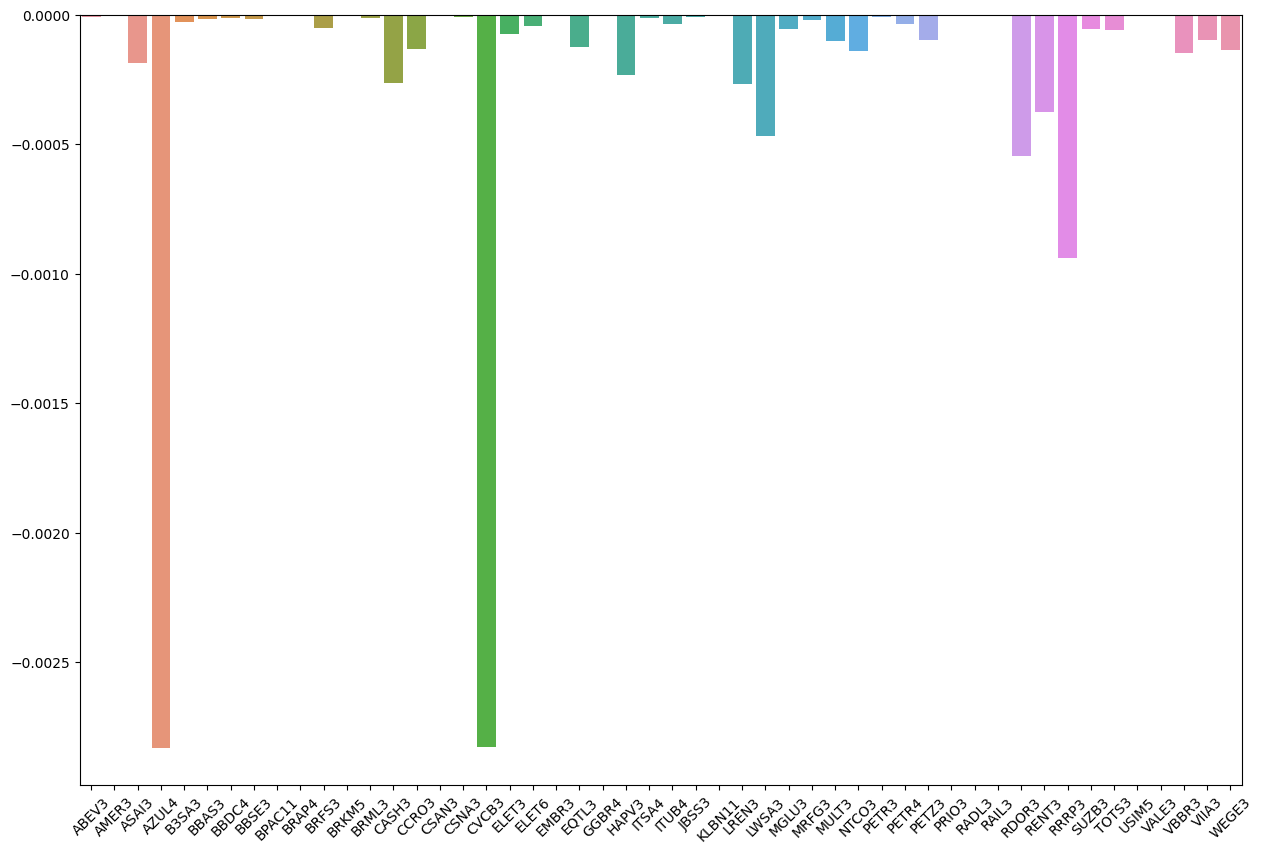

In [36]:
# Showing in a graph
plt.figure(figsize=(15, 10))
sns.barplot(x=delta.loc['diff'].index, y=delta.loc['diff'].values)
plt.xticks(rotation=45)
None

Q3.Escolha 2ações das 50 estudadas, que tenham sido negociadas desde pelo menos 01/11/2017, deixe claro quais você escolheu. Apresente graficamente o histórico de preços, de variação e a distribuição dos retornos diários delas. Cada ação deve ter seus gráficos apresentados como output de uma única célula.

In [46]:
# escolher automaticamente as duas ações com maior e pior retorno e que estão desde o começo do período

simple_return = (prices.pct_change() + 1).cumprod()
simple_return.iloc[-1].sort_values(ascending=False)

PRIO3     18.292035
JBSS3      5.907200
BPAC11     4.584821
WEGE3      4.281003
MRFG3      4.210191
CSNA3      3.847003
MGLU3      3.595976
VALE3      3.142668
SUZB3      3.116081
GGBR4      3.052071
RENT3      3.009238
TOTS3      2.654884
CSAN3      2.589776
LWSA3      2.560311
PETR3      2.287568
PETR4      2.232667
CASH3      2.050763
USIM5      1.994452
EQTL3      1.993671
ELET3      1.986061
HAPV3      1.911602
BRAP4      1.857031
ELET6      1.746556
B3SA3      1.645260
EMBR3      1.620104
RRRP3      1.612981
RADL3      1.592105
KLBN11     1.547289
BRKM5      1.526286
RAIL3      1.449346
AMER3      1.435993
VBBR3      1.282996
ITSA4      1.261765
BBDC4      1.126316
BBAS3      1.067083
PETZ3      1.060311
BBSE3      1.045578
ASAI3      0.914001
ITUB4      0.905727
AZUL4      0.890351
ABEV3      0.857143
MULT3      0.854486
LREN3      0.841939
CCRO3      0.746598
VIIA3      0.717821
BRML3      0.698816
NTCO3      0.691950
RDOR3      0.688082
BRFS3      0.516988
CVCB3      0.313698


Q4.Crie dataframes com os retornos mensais e trimestrais das 2 ações e a variação do IBOVESPA. A partir desses mostre a média, mediana, variança, 1º e 3º quartil para o retorno trimestrais e mensais das ações.

In [ ]:
#resample

Q5.Utilizando os dados dessas mesmas 2 ações implemente uma estratégia de trade para cada uma delas usando Índice de Força Relativa, com janela de 21 dias úteis e pontos de entrada de 75 e 25. Mostre o resultado dasestratégiaspara o período de 01/01/2018 a 31/12/2021.

In [ ]:
#rsi


Q6.Apresente  as  métricas e  gráficos  que  achar  relevantes  sobre  as  estratégias  da  Q5,  comparando  as duas ações e avaliando cada estratégia em comparação ao desempenho do IBOVESPA.

Bonus. Comente e, se possível, implementecomo seria possível melhorar as estratégias testadas.Lembre-se,avaliaremos também a clareza e compreensibilidadedo código, utilize comentários a vontade para facilitar o entendimento. Para poder avaliar o código precisamos ser capazes de executá-lo, garantaque todas as dependências são facilmente encontradas e disponíveis.